# Dokumentacja projektu
## Lazy caterer's sequence
## Jakub Białoń

### Wstęp
Poniższy dokument stanowi sprawozdaie projektu semestralnego, realizowanego w ramach zajęć z Logiki Algorytmicznej dla Inżynierów. Tematem było oblicznie dowolnego elementu ciągu "Lazy caterer's sequence" oraz reprezentacja obliczeń za pomocą grafu. Projetk został zralizowany w języku python przy użyciu bibliotek Matplotlib ora Networkx.

### Zagadnienia Teoretyczne
Kolejne elementy ciągu "Lazy caterer's sequence" to maksymalna liczba części na jakie można podzielić koło, za pomocą **n** cięciw. Na przykład za pomocą trzech cięciw, okrąg możemy podzielić na maksymalnie 7 części
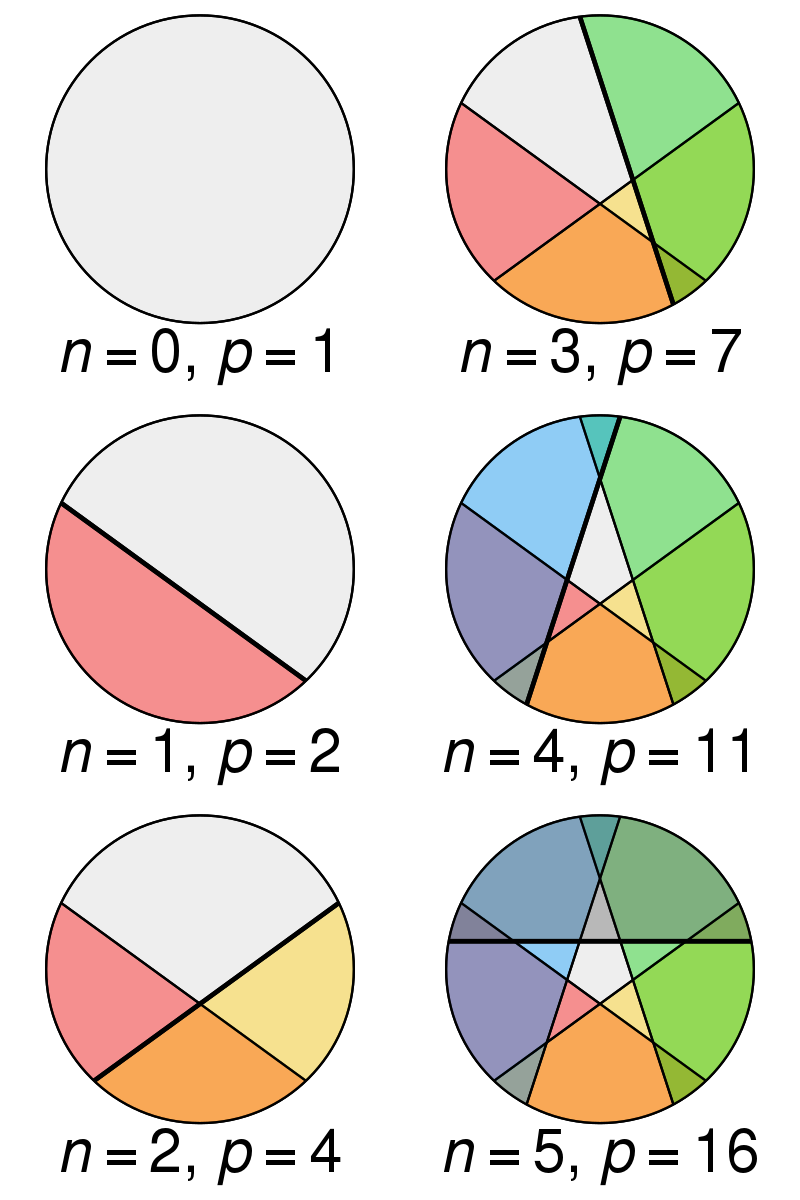


Kolejne elementy ciągu możemy obliczyć z prostego wzoru:

$p = \frac{n^2+n+2}{2} = f(n)$

Zaby uzyskać maksymalną liczbę części, n-te cięcie powinno przecinać wszystkie inne poprzednie linie cięcia, ale nie może przecinać żadnego przecięcia poprzednich linii. Zatem n-ta linia jest przecinana w n - 1 miejscach i na n segmentów linii. Każde cięcie dzieli jeden kawałek n-1 pokrojonego koła na dwie nowe części, dodając dokładnie n nowych kawałków. Zatem całkowita liczba sztuk po n cięciach wynosi

$f(n) = n + f(n - 1)$

$f(n) = n + f(n - 1) + f(n - 2)$

$f(n) = n + f(n - 1) + f(n - 2) + ... + 1 + f(0)$

$f(0) = 1$ ponieważ przed jakimkolwiek podziałem mamy całe koło, które stanowi jeden duży kawałek

$f(n) = 1 + (1 + 2 + 3 + 4 + 5 + ... + n)$

Powyższe wyrażenie można uprościć do wzoru na maksymalną liczbę części, korzystając ze wzoru na sumę ciągu arytmetycznego. Okazuję się więc że kolejne elementy tego ciągu można uzyskać dodjąc do jedynki **n** kolejnuych liczb naturlanych

In [33]:
"""Importuję niezbędne biblioteki"""
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

In [34]:
class Node:
    """Reprezentacja węzła w grafie"""
    
    def __init__(self, label):
        """Inicjuje obiekt Node"""
        self.label = label

    def __str__(self):
        """Nadpisuje metodę __str__ z klasy object"""
        return str(self.label)

In [43]:
def central_polygonal_numbers(number_of_cuts):
    """Funkcja tworzy graf dla zadanego elementu ciągu.
    
    Do zbudowania grafu wykorzystuje networkx.Digraph.
    
    Arguments:
        number_of_cuts: liczba prostych lini jakimi chcemy podzielić koło.
    
    """
    #Tworzę obiekt grafu
    graph = nx.DiGraph()

    #Inicjuję pierwszy element grafu, zawsze równy jeden 
    base_node = create_root()
    graph.add_node(base_node)

    if number_of_cuts != 0:
        plus_node = create_plus_node()
        
        #tworzy pierwszą krawędź
        graph.add_edge(base_node, plus_node)
        
        #Rekurencyjnie tworzę kolejne elementy grafu
        create_next_node(graph, plus_node, 1, number_of_cuts)
        
    else:
        nx.draw(graph, node_size=1000, with_labels=True)
    
    plt.subplot(111)

    draw_polynomial_graph(graph)

    plt.show()

In [44]:
def create_root() -> Node:
    """Funckja tworzy pierwszy element grafu"""
    return Node("1")

In [45]:
def create_plus_node() -> Node:
    """Funckja tworzy węzęł z etykietą +"""
    return Node("+")

In [46]:
def create_next_node(graph, last_node, next_node, number_of_cuts):
    """Funkcja rekurencyjna, tworzy kolejne elementy grafu.
    
    Arguments:
        graph: graf na którym pracujemy.
        last_node: ostatni dodany węzeł.
        next_node: etykieta następnego węzła.
        number_of_cust: liczba prostych, którymi chcemy podzielić okrąg.
    
    """

    graph.add_edge(last_node, Node(next_node))

    #przypadek elementarny
    if number_of_cuts == next_node:
        return 0

    plus_node = create_plus_node()
    graph.add_edge(last_node, plus_node)
    create_next_node(graph, plus_node, next_node+1, number_of_cuts)

In [47]:
def draw_polynomial_graph(graph):
    """Rysuje podany graf.

    Do rysowania wykorzystuje networkx.draw.

    Arguments:
        graph: Graf.
    """

    # utworzenie słownika określającego odległości między węzłami grafu
    df = pd.DataFrame(index=graph.nodes(), columns=graph.nodes())
    for row, data in nx.shortest_path_length(graph):
        for col, dist in data.items():
            df.loc[col, row] = dist

    df = df.fillna(df.max().max())

    #rysowanie grafu
    nx.draw(graph, node_size=1000, pos=nx.kamada_kawai_layout(graph, dist=df.to_dict()), with_labels=True)


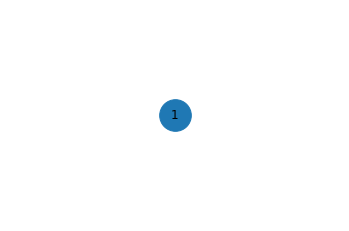

In [48]:
central_polygonal_numbers(0)

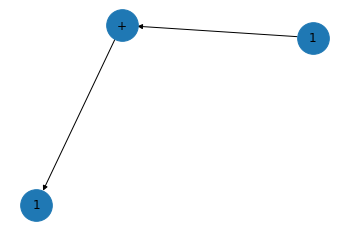

In [49]:
central_polygonal_numbers(1)

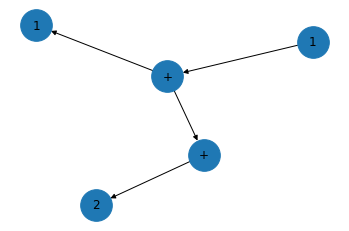

In [51]:
central_polygonal_numbers(2)

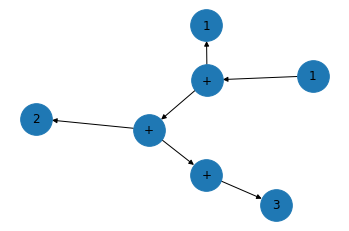

In [52]:
central_polygonal_numbers(3)

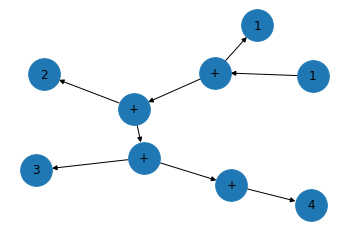

In [53]:
central_polygonal_numbers(4)

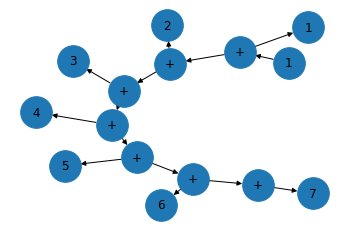

In [54]:
central_polygonal_numbers(7)